In [3]:
import requests

url = "https://ev.or.kr/nportal/evcarInfo/selectEvcarStationPriceSearch.ajax"
params = {
    "srecordCountPerPage":"100",
    "spageNo":1,
    "spageSize":10,
    "selExcelCnt":100
}
res = requests.post(url, params=params)
data = res.json()
# import pprint
# pprint.pprint(data)
import pandas as pd
df = pd.DataFrame(data['list'], columns=["BNM" , 'PRICE_TYPE_NM', "MEMBER_PRICE","GUEST_PRICE"])
df.columns = ['운영기관명', '구분', '회원가','비회원가']

df.to_csv('기관별_전기차충전가격.csv',index=False)

In [5]:
#pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [4]:
#  csv 파일 읽기
import pandas as pd

charger = pd.read_csv('충전소 리스트.csv')

charger.head()

# https://tago.kr/charge/address.htm _data source

,번호,충전소명,충전소ID,충전기ID,충전기타입,소재지 도로명 주소,위도,경도,이용가능시간,기관ID,운영기관명,관리업체 전화번호,충전기상태,상태갱신일시,충전기용량,지역코드,주차료무료 여부,충전소 안내
0,1,종묘 공영주차장,ME000001,1.0,-,"서울특별시 종로구 종로 157, 지하주차장 4층 하층 T구역",37.571076,126.995880,24시간 이용가능,ME,환경부,1661-9408,사용가능,20210125092335,급속(50kW),11,무료,NaN
1,2,세종로 공영주차장,ME000002,1.0,급속,"서울특별시 종로구 세종대로 189, 지하주차장 4층 D구역 계단실 앞",37.573611,126.976011,24시간 이용가능,ME,환경부,1661-9408,사용불가,20210112085004,급속(50kW),11,무료,NaN
2,3,그랜드앰배서더 서울,ME000003,1.0,급속,"서울특별시 중구 동호로 287, 대형버스주차장",37.559352,127.002350,24시간 이용가능,ME,환경부,1661-9408,사용불가,20210125083831,급속(50kW),11,무료,NaN
3,4,한강진역 공영주차장,ME000004,1.0,-,"서울특별시 용산구 한남동 산10-84, 지상실외주차장",37.540085,127.002804,24시간 이용가능,ME,환경부,1661-9408,사용불가,20210125072342,급속(50kW),11,무료,NaN
4,5,마장동사무소 앞(공중전화부스),ME000006,1.0,급속,서울특별시 성동구 마장동 808,37.566094,127.045526,24시간 이용가능,ME,환경부,1661-9408,사용가능,20210125085901,급속(50kW),11,무료,NaN


In [4]:
type(charger)

pandas.core.frame.DataFrame

In [8]:
#운영기관명 조회
op_name = set(charger['운영기관명'])
print(op_name)

#enhancing readability using 'enumerate'
for idx, name in enumerate(op_name, 1):
    print(f"{idx}. {name}")

{'제주에너지공사', '주식회사 에버온', '구평주유소', '대영채비(주)', '오크밸리', '차지비', '케이씨씨 중앙연구소', '구덕주유소', '에버온', '타디스테크놀로지(evPlug)', '씨어스', '보타리에너지(주)', '덕천고속주유소', '이카플러그', '운영시스템', '(주)스타코프', '한국전기공사협회', nan, '빛가람중학교', '나주시', 'DIC주유소', '전주시', 'GS칼텍스', '한국전기차인프라기술', '주식회사에버온', '제주테크노파크', '포스코ICT', '그린주유소', '(주)클린일렉스', '한국전기차충전서비스', '가야로주유소', '수영강변주유소', '광주시', '삼성이브이씨', 'SK에너지', '대원주유소', 'evPlug', '광장주유소', 'evplug(타디스테크놀로지', '부산신항주유소', '서울시', '지엔텔', '한국환경공단', 'KT', '제인모터스', '나전주유소', '클린일렉스', '시그넷', 'evplug(타디스테크놀로지)', '파워큐브', 'LG헬로비전', '한국전력', '에스트래픽(주)', '이카플럭', '가야주유소', '기타시설', '삼척시', '케이티', '대구환경공단', '(주)제주전기자동차서비스', '정읍시', '제주특별자치도', '에스트래픽', '부안군', '(주)삼성이브이씨', '한국컴퓨터', '대영채비㈜', '대영채비', '이지차저', '매니지온', '종하아이앤씨', '환경부', '군포시', '금강주유소', '제주전기자동차서비스', '보타리에너지', '건국대학교', '금정주유소', 'evmost', '익산시', '백양로주유소', '(주)차지인', 'evPlug(타디스테크놀로지)', '타디스테크놀로지', '한국전력공사 강릉지사', '스타코프', '한국전력공사', 'KP', '제주도청', '대영채비주(주)', '한국전기차충전서비스(주)'}
1. 제주에너지공사
2. 주식회사 에버온
3. 구평주유소
4. 대영채비(주)
5. 오크밸리
6. 차지비
7. 케이씨씨 중앙연구소
8. 구덕주유소
9. 에버온


In [5]:
# data merge '기관 ID 기준'

# import pandas as pd

# op_name = pd.read_csv('충전소리스트')
# df2 = pd.read_csv('file2.csv')

# # '기관ID'를 기준으로 병합 (inner join을 기본으로 설정)
# ev_merged = pd.merge(op_name, df2, on='기관ID', how='inner')

# print(ev_merged)


import pandas as pd

# CSV 파일 불러오기
f1 = pd.read_csv('충전소 리스트.csv')  # 충전기관 위치, 이름 파일
f2 = pd.read_csv('기관별_전기차충전가격.csv')  # 충전기관 가격, 이름 파일

# '운영기관명'을 기준으로 병합 (left join 사용)
merged_file = pd.merge(f1, f2[['운영기관명', '비회원가', '회원가']], on='운영기관명', how='left')

# 병합된 데이터프레임 확인
print(merged_file)

# 병합된 파일을 저장하고 싶다면 CSV로 저장 가능
merged_file.to_csv('EV_merged.csv', index=False)



          번호        충전소명     충전소ID  충전기ID 충전기타입  \
0          1    종묘 공영주차장  ME000001    1.0     -   
1          1    종묘 공영주차장  ME000001    1.0     -   
2          2   세종로 공영주차장  ME000002    1.0    급속   
3          2   세종로 공영주차장  ME000002    1.0    급속   
4          3  그랜드앰배서더 서울  ME000003    1.0    급속   
...      ...         ...       ...    ...   ...   
23901  16762  언양읍 행정복지센터  US200420    1.0     -   
23902  16762  언양읍 행정복지센터  US200420    1.0     -   
23903  16763  화봉공원 공영주차장  US200421    1.0     -   
23904  16763  화봉공원 공영주차장  US200421    1.0     -   
23905  16764        test       NaN    NaN     -   

                                   소재지 도로명 주소         위도          경도  \
0           서울특별시 종로구 종로 157, 지하주차장 4층 하층 T구역  37.571076  126.995880   
1           서울특별시 종로구 종로 157, 지하주차장 4층 하층 T구역  37.571076  126.995880   
2      서울특별시 종로구 세종대로 189, 지하주차장 4층 D구역 계단실 앞  37.573611  126.976011   
3      서울특별시 종로구 세종대로 189, 지하주차장 4층 D구역 계단실 앞  37.573611  126.976011   
4                   서울특별시 중

In [3]:
op_name2 = set(merged_file['운영기관명'])
print(op_name2)

#enhancing readability using 'enumerate'
for idx, name in enumerate(op_name2, 1):
    print(f"{idx}. {name}")

{'나전주유소', '금정주유소', '(주)제주전기자동차서비스', '타디스테크놀로지(evPlug)', '지엔텔', '(주)삼성이브이씨', '한국컴퓨터', '구덕주유소', '한국전력공사 강릉지사', '이카플러그', '시그넷', '타디스테크놀로지', '이카플럭', '전주시', '군포시', '나주시', '정읍시', '대원주유소', 'evPlug', nan, '한국전기차충전서비스(주)', '삼척시', '부안군', '수영강변주유소', '대영채비(주)', '(주)스타코프', '스타코프', '종하아이앤씨', '케이씨씨 중앙연구소', '(주)차지인', 'evmost', '한국전기차충전서비스', '에스트래픽(주)', '덕천고속주유소', '한국전기공사협회', '클린일렉스', '보타리에너지', '금강주유소', '대영채비', '가야주유소', '에스트래픽', '케이티', '삼성이브이씨', 'KP', '운영시스템', '에버온', '제주전기자동차서비스', '주식회사에버온', '백양로주유소', '가야로주유소', '제주테크노파크', '매니지온', 'SK에너지', '(주)클린일렉스', '대구환경공단', '빛가람중학교', '환경부', '서울시', 'DIC주유소', '제인모터스', 'KT', '제주에너지공사', '한국전력공사', '오크밸리', '건국대학교', '익산시', 'evplug(타디스테크놀로지)', '보타리에너지(주)', 'evPlug(타디스테크놀로지)', '이지차저', '제주도청', '한국환경공단', '광장주유소', '차지비', '대영채비주(주)', '한국전력', '그린주유소', 'LG헬로비전', '부산신항주유소', '대영채비㈜', '씨어스', '광주시', 'evplug(타디스테크놀로지', '기타시설', '구평주유소', '주식회사 에버온', 'GS칼텍스', '제주특별자치도', '한국전기차인프라기술', '파워큐브', '포스코ICT'}
1. 나전주유소
2. 금정주유소
3. (주)제주전기자동차서비스
4. 타디스테크놀로지(evPlug)
5. 지엔텔
6. (주)삼성이브이씨
7. 한국컴퓨터
8. 구

In [41]:
# 유가 붐포 및 평균 가격 분석
#!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
# df = pd.read_csv('gas_station_data.csv')

# # 휘발유 가격 히스토그램
# df['휘발유_가격'].hist(bins=20)
# plt.title('휘발유 가격 분포')
# plt.xlabel('가격 (원)')
# plt.ylabel('주유소 수')
# plt.show()


In [6]:
merged_file2 = pd.read_csv('EV_merged.csv')
merged_file2['지역명'] = merged_file2['지역코드']
merged_file2['지역명'] = merged_file2['지역명'].astype(str)
merged_file2['지역명'] = merged_file2['지역명'].str.replace('11','Seoul')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('26','Busan')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('27','Daegu')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('28','Incheon')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('29','Gwangju')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('30','Daejeon')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('31','Ulsan')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('36','Sejong')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('41','Gyeong-gi')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('42','Gangwon')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('43','Chungbuk')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('44','Chungnam')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('45','Jeonbuk')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('46','Jeonnam')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('47','Gyeongbuk')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('48','Gyeongnam')
merged_file2['지역명'] = merged_file2['지역명'].str.replace('50','Jeju')
print(merged_file2['지역명'])
merged_file2.to_csv('EV_merged2.csv', index=False)

0        Seoul
1        Seoul
2        Seoul
3        Seoul
4        Seoul
         ...  
23901    Ulsan
23902    Ulsan
23903    Ulsan
23904    Ulsan
23905        0
Name: 지역명, Length: 23906, dtype: object


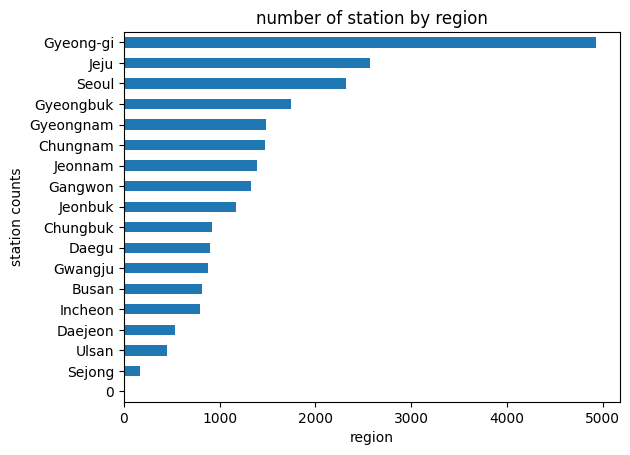

In [8]:
# 지역별 충전소 현황 분석
# 지역별 충전소 집계

import matplotlib.pyplot as plt
region_counts = merged_file2['지역명'].value_counts()

# 막대그래프 시각화
region_counts.plot(kind='barh')
plt.title('number of station by region')
plt.xlabel('region')
plt.ylabel('station counts')
plt.gca().invert_yaxis()
plt.show()


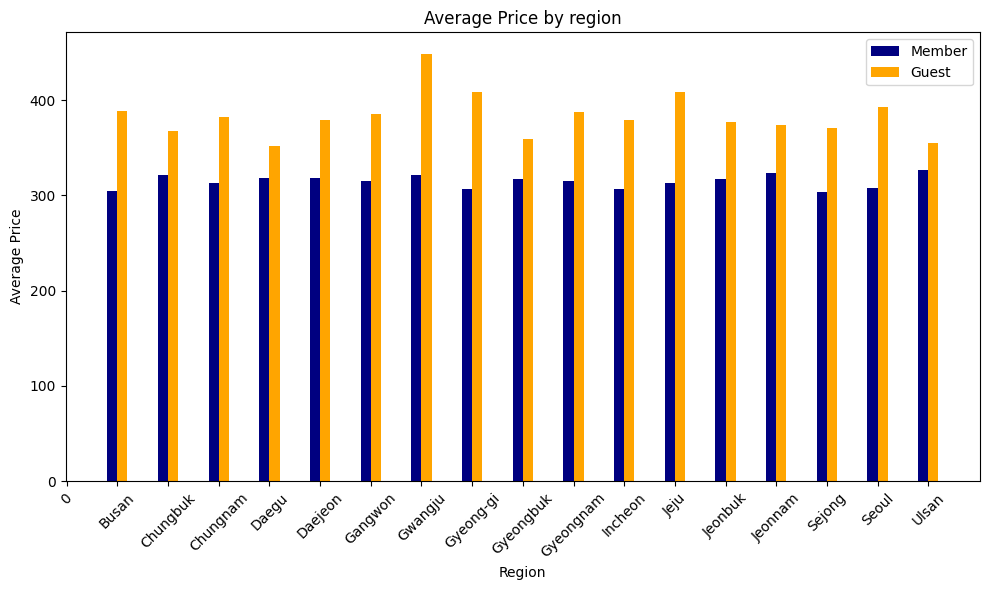

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 불러오기
file = pd.read_csv('EV_merged2.csv')

# 지역명 기준으로 회원가와 비회원가의 평균을 구하기
avg_price_region = file.groupby('지역명')[['회원가', '비회원가']].mean().reset_index()

# 바 차트 그리기
plt.figure(figsize=(10, 6))

# 회원가에 대한 바 차트
plt.bar(avg_price_region['지역명'], avg_price_region['회원가'], color='navy', label='Member', width=0.4, align='center')

# 비회원가에 대한 바 차트 (약간 오른쪽으로 이동시키기 위해 width 조절)
plt.bar(avg_price_region['지역명'], avg_price_region['비회원가'], color='orange', label='Guest', width=0.2, align='edge')

# 그래프에 추가적인 설정
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price by region')
plt.xticks(rotation=45)
plt.legend()

# 차트 보여주기
plt.tight_layout()
plt.show()


C:\Users\Playdata\AppData\Local\Temp\ipykernel_8364\3477167804.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([file['회원가'].dropna(), file['비회원가'].dropna()], labels=['Member', 'Guest'], patch_artist=True)


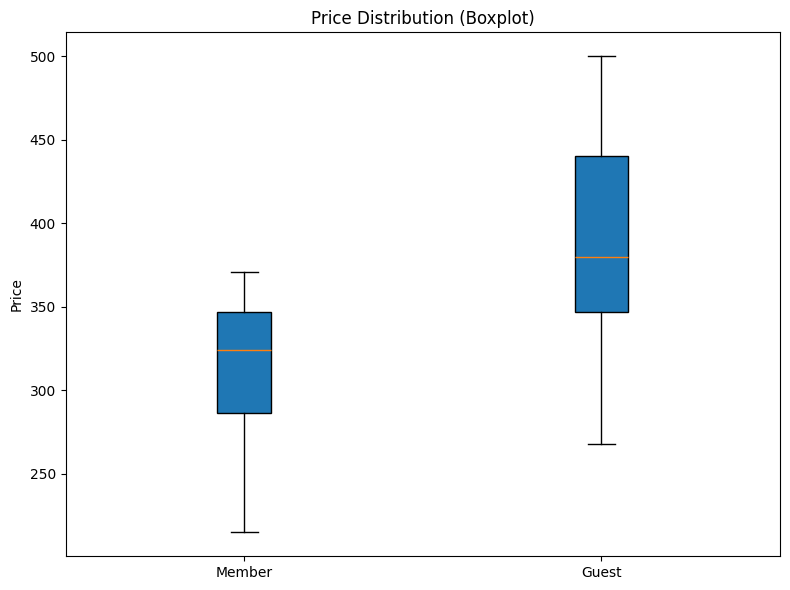

In [31]:
# Boxplot 
plt.figure(figsize=(8, 6))

# 회원가와 비회원가의 박스플롯 그리기
plt.boxplot([file['회원가'].dropna(), file['비회원가'].dropna()], labels=['Member', 'Guest'], patch_artist=True)

# 그래프에 추가적인 설정
plt.title('Price Distribution (Boxplot)')
plt.ylabel('Price')

# 차트 보여주기
plt.tight_layout()
plt.show()


          지역명        비회원가
0           0         NaN
1       Busan  388.646085
2    Chungbuk  367.899254
3    Chungnam  382.688839
4       Daegu  351.796078
5     Daejeon  379.335154
6     Gangwon  386.036652
7     Gwangju  448.950832
8   Gyeong-gi  408.593669
9   Gyeongbuk  359.251060
10  Gyeongnam  388.160094
11    Incheon  379.442402
12       Jeju  408.375977
13    Jeonbuk  376.692537
14    Jeonnam  374.396966
15     Sejong  370.538843
16      Seoul  392.667717
17      Ulsan  354.739163


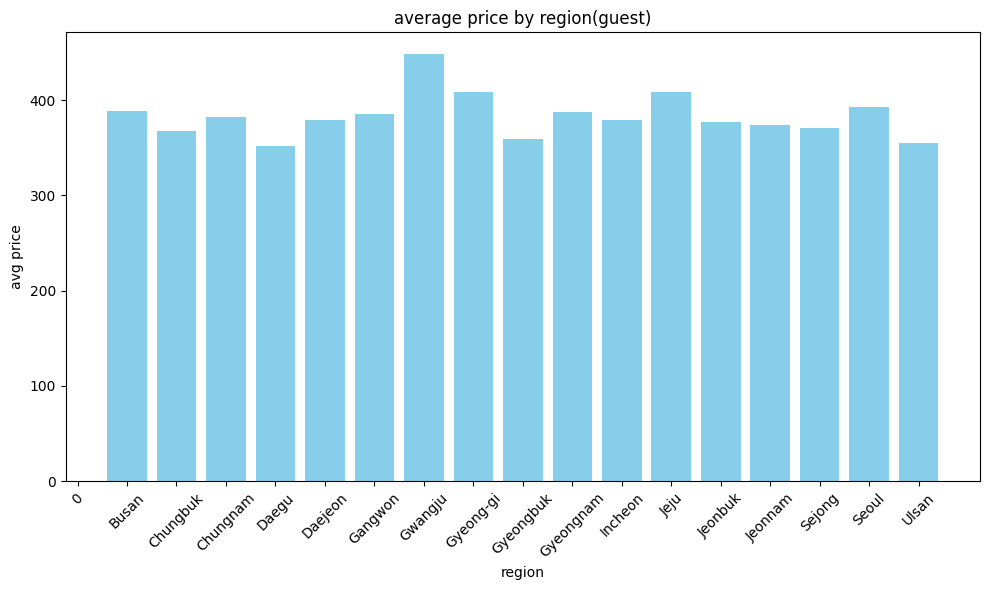

In [39]:
merged_file2.to_csv('EV_merged2.csv', index=False)
#지역별 평균 가격

avg_price_region2 = merged_file2.groupby('지역명')['비회원가'].mean().reset_index()

print(avg_price_region2)

# 시각화 (바 차트)
plt.figure(figsize=(10, 6))
plt.bar(avg_price_region2['지역명'], avg_price_region2['비회원가'], color='skyblue')
plt.xlabel('region')
plt.ylabel('avg price')
plt.title('average price by region(guest)')
plt.xticks(rotation=45)  # 지역코드 라벨이 겹치지 않도록 회전
plt.tight_layout()

plt.show()